# Airbnb Analysis

### Balthazar Paixao

### Year of the development: 2020

### Updated on: 2023-07-29

### Description

This project is a quick data analysis of Airbnb data from the city of Rio de Janeiro, Brazil. The data was obtained from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html) and from [Data.rio](https://www.data.rio/maps/limite-de-bairros) the Rio de Janeiro City Hall Data Institute.

The objective of this project is to analyze the data and extract some insights from it, showing some interesting facts about the city and the Airbnb market in Rio de Janeiro that could be discovered just by this data.


In [1]:
import pandas as pd  # to manipulate data
import matplotlib.pyplot as plt  # to plot
import seaborn as sns  # to make plots prettier
from unidecode import unidecode  # to remove accents from strings

# Reading, cleaning and merging data...


In [2]:
# Data source http://insideairbnb.com/get-the-data.html
# http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-06-26/visualisations/listings.csv
df_listings = pd.read_csv("./data/airbnb_listings.csv")

In [3]:
# Showing the first 3 rows of the dataset to see how the data looks like
df_listings.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
7905,756487875507001284,Rental unit in Rio de Janeiro · 1 bedroom · 2 ...,89300523,José,NaN,Ipanema,-22.983400,-43.214240,Entire home/apt,829,3,1,2023-01-02,0.17,1,365,1,NaN
12808,792150085261003294,Home in Rio de Janeiro · ★5.0 · 2 bedrooms · 2...,408900,Adam,NaN,Vidigal,-22.997679,-43.241662,Entire home/apt,225,3,5,2023-06-12,1.24,2,50,5,NaN
187,20835077,Serviced apartment in Copacabana · ★3.80 · 1 b...,78499152,Ricardo,NaN,Copacabana,-22.971790,-43.186600,Entire home/apt,243,3,5,2022-01-16,0.10,2,0,0,NaN


In [4]:
# Verifying each column, its type and the amount of non-null values in each column
print(df_listings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31401 entries, 0 to 31400
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31401 non-null  int64  
 1   name                            31401 non-null  object 
 2   host_id                         31401 non-null  int64  
 3   host_name                       31398 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   31401 non-null  object 
 6   latitude                        31401 non-null  float64
 7   longitude                       31401 non-null  float64
 8   room_type                       31401 non-null  object 
 9   price                           31401 non-null  int64  
 10  minimum_nights                  31401 non-null  int64  
 11  number_of_reviews               31401 non-null  int64  
 12  last_review                     

As we can see most of the listings are well filled with data. The only columns that have missing values are the `host_name`, `neighbourhood_group`, `last_review`, `reviews_per_month`, and `license`.

- `neighbourhood_group` and `license` are missing in all the listings, for this reason we can drop them.
- `host_name` is missing in only 0.01% of the listings, so we can keep them.
- `last_review` and `reviews_per_month` are missing about 25% of the listings, so we will keep them and analyze what we can do further.


In [5]:
# Dropping columns neighbourhood_group and license
df_listings = df_listings.drop(columns=["neighbourhood_group", "license"])

In [6]:
# Top 10 neighbourhoods with most listings
print(df_listings.neighbourhood.value_counts()[:10])

neighbourhood
Copacabana                  9246
Barra da Tijuca             3122
Ipanema                     3069
Jacarepaguá                 1573
Recreio dos Bandeirantes    1553
Leblon                      1531
Botafogo                    1352
Santa Teresa                1089
Centro                       996
Flamengo                     711
Name: count, dtype: int64


Here we can verify the 10 places that have the most availability of listings. It is not difficult to realize that as one of the biggest tourist spots in the city of Rio, the neighborhoods of the Zona Sul (South Zone) have a greater number of stays.

Copacabana which is the most famous neighborhood in Rio de Janeiro, has the largest number of listings available with almost 3 times more listing than the second position. It is also possible to see that the neighborhoods of Ipanema and Leblon, which are also very famous, are among the 10 places with the most availability of listings.


In [7]:
# Veryfing some statistical properties of the dataset
df_listings[
    [
        "price",
        "minimum_nights",
        "number_of_reviews",
        "reviews_per_month",
        "calculated_host_listings_count",
    ]
].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,31401.000000,31401.000000,31401.000000,23527.000000,31401.000000
mean,852.954014,4.680583,19.083978,0.955199,9.878507
std,7285.051720,23.398843,39.615992,1.079195,28.305339
min,0.000000,1.000000,0.000000,0.010000,1.000000
25%,190.000000,1.000000,0.000000,0.200000,1.000000
50%,313.000000,2.000000,4.000000,0.560000,2.000000
75%,600.000000,3.000000,18.000000,1.340000,4.000000
max,547643.000000,1125.000000,603.000000,15.950000,225.000000


With this quick describe command we can see some characteristics about the statistics of the columns that we choose. Some interesting cases to point out here are the outliers present in information like `price`, `minimum_nights`, and `calculated_host_listings_count`. In these cases, for example, we have stays that cost R\$ 0.00 and others that cost R\$ 547,643.00 (half a million Reais!), in addition to accommodations that require a minimum of 1125 nights, which corresponds to just over 3 years. Looking to the host listings count, which is the "the number of listings the host has in the current scrape, in the city/region geography", we can see that there are hosts with 225 listings in Rio, which is a lot of listings for a single host.

Another important point is that, in relation to the price, we can notice that the average of the charged value is higher than the value of the 3rd quartile of prices. This relationship between the indicators shows how the identified outliers contrast with a large concentration of values charged in the first and second quartile of price. This is also shown by the degree of standard deviation.

Outliers like these can distort the analysis of the data, so it is important to identify them and, if necessary, remove them from the dataset. Metrics like mean, standard deviation, and quartiles can be distorted by the presence of outliers, so it is important to be aware of them. Median, for example, is a metric that is not affected by outliers, so it is a good alternative to use in these cases.


In [8]:
# Data from Rio de Janeiro City Hall Institute
df_neighbourhood_limits = pd.read_csv("./data/neighbourhood_limits.csv")

In [9]:
# Showing the first 3 rows of the dataset to see how the data looks like
df_neighbourhood_limits.head(3)

,objectid,área,nome,regiao_adm,area_plane,codbairro,codra,codbnum,link,rp,cod_rp,codbairro_long,st_areashape,st_perimetershape
0,325,1.705685e+06,Paquetá,PAQUETA,1,13,21,13,Paqueta&area=013 ...,Centro,1.1,13,1.705689e+06,24841.459984
1,326,4.056403e+06,Freguesia (Ilha),ILHA DO GOVERNADOR,3,98,20,98,Freguesia (Ilha) &area=98 ...,Ilha do Governador,3.7,98,4.056414e+06,18303.621385
2,327,9.780465e+05,Bancários,ILHA DO GOVERNADOR,3,97,20,97,Bancários &area=97 ...,Ilha do Governador,3.7,97,9.780492e+05,7758.791895


We can see two interesting columns to analyze:

- `area`: area in square meters of the neighbourhood
- `rp`: region of planning of the neighbourhood (it is equivalent to neighbourhood_group columns in the listings dataset)

To join the two datasets, we will use the join technique where our keys will be `df_listings['neighbourhood']` and `df_neighbourhoods['name']`.


In [10]:
# Keep only the columns we need
cols_to_keep = ["área", "nome", "rp"]
df_neighbourhood_limits = df_neighbourhood_limits[cols_to_keep]

# Rename columns
renaming_columns = {"área": "area", "nome": "name", "rp": "region_planning"}
df_neighbourhood_limits = df_neighbourhood_limits.rename(
    columns=renaming_columns)

In a join process it is very important that our keys matches, so we need to normalize the names of the neighborhoods to avoid differences in the writing between one base and another.


In [11]:
# Using unidecode to remove accents from strings, lower() to lowercase and strip() to remove spaces.

df_listings["neighbourhood_decoded"] = df_listings["neighbourhood"].apply(
    lambda x: unidecode(str(x).lower().strip())
)
df_neighbourhood_limits["neighbourhood_decoded"] = df_neighbourhood_limits[
    "name"
].apply(lambda x: unidecode(str(x).lower().strip()))

# We can drop the column name from df_neighbourhood_limits, since it is the same as neighbourhood_decoded
df_neighbourhood_limits = df_neighbourhood_limits.drop(columns=["name"])

In [12]:
# Checking results on the listings dataset
df_listings["neighbourhood_decoded"].sample(3)

22395         centro
22905    jacarepagua
12987     copacabana
Name: neighbourhood_decoded, dtype: object

In [13]:
# Checking results on the neighbourhoods dataset
df_neighbourhood_limits["neighbourhood_decoded"].sample(3)

121           flamengo
160           gericino
67     engenheiro leal
Name: neighbourhood_decoded, dtype: object

In [14]:
# Using a LEFT JOIN ON df_listings.neighbourhood_decoded = df_neighbourhood_limits.neighbourhood_decoded
df_complete = df_listings.merge(
    df_neighbourhood_limits, how="left", on="neighbourhood_decoded"
)

In [15]:
# Rename region_planning to neighbourhood_group
df_complete = df_complete.rename(
    columns={"region_planning": "neighbourhood_group"})
# Capitalize neighbourhood_group in Title Case
df_complete["neighbourhood_group"] = df_complete["neighbourhood_group"].str.title()
# Convert neighbourhood_group to category
df_complete["neighbourhood_group"] = df_complete["neighbourhood_group"].astype(
    "category"
)

# Drop neighbourhood_decoded which is a duplicate of neighbourhood
df_complete = df_complete.drop(columns=["neighbourhood_decoded"])

In [16]:
# Showing a sample of the result
df_complete.sample(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,area,neighbourhood_group
8940,41108252,Rental unit in Flamengo · ★4.81 · 1 bedroom · ...,166770967,Patricio,Flamengo,-22.92965,-43.17705,Entire home/apt,83,2,86,2023-06-19,2.02,2,129,40,1.646254e+06,Zona Sul
23458,17292672,Home in Jacarepagua · 2 bedrooms · 2 beds · 1 ...,116656165,Nilson José,Jacarepaguá,-22.92617,-43.40175,Entire home/apt,1433,7,0,NaN,NaN,1,364,0,7.579648e+07,Jacarepaguá
19137,15838249,Rental unit in Rio de Janeiro · ★4.46 · 1 bedr...,10904277,Edson,Barra da Tijuca,-23.00398,-43.34236,Entire home/apt,300,2,160,2023-05-12,2.02,3,25,16,4.815063e+07,Barra Da Tijuca


In [17]:
# Show all the unique values in the column 'neighbourhood_group'
df_complete["neighbourhood_group"].unique()

['Zona Sul', 'Centro', 'Guaratiba', 'Tijuca', 'Barra Da Tijuca', ..., 'Méier', 'Penha', 'Pavuna', 'Santa Cruz', 'Ramos']
Length: 16
Categories (16, object): ['Bangu', 'Barra Da Tijuca', 'Campo Grande', 'Centro', ..., 'Ramos', 'Santa Cruz', 'Tijuca', 'Zona Sul']

After reading the result of the unique values of `neighbourhood_group`, we sure can help to make this results better, grouping some of them inputing data from the point of view of a person who lives in Rio for almost 10 years.


In [18]:
zonas_dict = {
    "Tijuca": "Zona Norte",
    "Inhaúma": "Zona Norte",
    "Méier": "Zona Norte",
    "Ramos": "Zona Norte",
    "Penha": "Zona Norte",
    "Ilha Do Governador": "Zona Norte",
    "Madureira": "Zona Norte",
    "Pavuna": "Zona Norte",
    "Bangu": "Zona Oeste",
    "Campo Grande": "Zona Oeste",
    "Bangu": "Zona Oeste",
    "Jacarepaguá": "Zona Oeste",
    "Santa Cruz": "Zona Oeste",
    "Barra Da Tijuca": "Zona Oeste",
    "Guaratiba": "Zona Oeste",
}
df_complete = df_complete.replace({"neighbourhood_group": zonas_dict})

print(
    "Neighbouhood Groups after this process: ",
    ", ".join(df_complete.neighbourhood_group.unique()),
    ".",
    sep="",
)

Neighbouhood Groups after this process: Zona Sul, Centro, Zona Oeste, Zona Norte.


In [19]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31401 entries, 0 to 31400
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              31401 non-null  int64   
 1   name                            31401 non-null  object  
 2   host_id                         31401 non-null  int64   
 3   host_name                       31398 non-null  object  
 4   neighbourhood                   31401 non-null  object  
 5   latitude                        31401 non-null  float64 
 6   longitude                       31401 non-null  float64 
 7   room_type                       31401 non-null  object  
 8   price                           31401 non-null  int64   
 9   minimum_nights                  31401 non-null  int64   
 10  number_of_reviews               31401 non-null  int64   
 11  last_review                     23527 non-null  object  
 12  reviews_per_month 

# Analysis


## Price

As said before, the describe function allowed us to identify some outliers regarding the price charged for the stay. In the table below, we selected these outliers so that we can analyze them separately and make approximations between each of these accommodations.


In [20]:
price_min = df_complete.price.min()
price_max = df_complete.price.max()

df_complete[(df_complete.price == price_min) |
            (df_complete.price == price_max)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,area,neighbourhood_group
1679,43148433,Hotel in Copacabana · Studio,318396893,Américas,Copacabana,-22.97081,-43.18915,Hotel room,0,2,0,NaN,NaN,1,0,0,4.100850e+06,Zona Sul
3697,43309227,Hotel in Copacabana · Studio,312899567,Augusto'S,Copacabana,-22.96159,-43.17491,Hotel room,0,1,0,NaN,NaN,1,0,0,4.100850e+06,Zona Sul
8735,43036115,Hotel in Copacabana · Studio,311180109,Rio Design,Copacabana,-22.98298,-43.19063,Hotel room,0,1,0,NaN,NaN,1,0,0,4.100850e+06,Zona Sul
11584,45636785,Boutique hotel in Copacabana · ★4.55 · Studio,369708259,Selina,Copacabana,-22.98010,-43.19002,Hotel room,0,1,216,2022-11-18,6.99,2,0,5,4.100850e+06,Zona Sul
22147,13879989,Home in Rio de Janeiro · 1 bedroom · 4 beds · ...,82046629,Elizabeth,São Cristóvão,-22.89993,-43.23033,Shared room,547643,6,0,NaN,NaN,1,365,0,4.105644e+06,Centro
28525,43148322,Hotel in Barra da Tijuca · Studio,315032561,Américas Barra,Barra da Tijuca,-23.00065,-43.41907,Hotel room,0,1,0,NaN,NaN,1,0,0,4.815063e+07,Zona Oeste
30367,43247506,Hotel in Centro · Studio,310461308,Américas Granada,Centro,-22.91155,-43.18380,Hotel room,0,1,0,NaN,NaN,1,0,0,5.424739e+06,Centro


After looking into our result rows, we can infer that from the 7 outliers in the price factor, we have 6 with the price of R\$ 0,00. If we go further in our analysis, we can see that all of them are Hotel rooms.

In this scenario, it is reasonable to say that the use of a price of R\$ 0,00 can be a marketing strategy used by these hosts. Thus, once the user is interested, the host starts to negotiate with him outside the Airbnb platform and increase his profit margin.

About the maximum price, it's very hard to say something about it. We can see that the most expensive listing is a shared room, which is very unusual. Going further, São Cristóvão is a neighborhood in the Zona Norte (North Zone) of Rio de Janeiro, which is not a very touristic place. However, we can't say that it is an outlier, since it is a valid listing.


In [21]:
# NEIGHBOURHOOD
print(
    df_complete["neighbourhood"].value_counts()[:6],
    "\n\n",
    df_complete["neighbourhood"].describe(),
    sep="",
)

neighbourhood
Copacabana                  9246
Barra da Tijuca             3122
Ipanema                     3069
Jacarepaguá                 1573
Recreio dos Bandeirantes    1553
Leblon                      1531
Name: count, dtype: int64

count          31401
unique           153
top       Copacabana
freq            9246
Name: neighbourhood, dtype: object


### **Neighbourhood**

Considering what was presented, we see the large number of accommodations present in Copacabana. In addition, an interesting fact is that there is an offer of stays from Airbnb in 153 of the 164 neighborhoods in the city of Rio de Janeiro, according to data from Rio City Hall.


In [22]:
# NEIGHBOURHOOD GROUPS
print(
    df_complete["neighbourhood_group"].value_counts()[:6],
    df_complete["neighbourhood_group"].describe(),
    sep="\n\n",
)

neighbourhood_group
Zona Sul      19014
Zona Oeste     8307
Centro         2487
Zona Norte     1593
Name: count, dtype: int64

count        31401
unique           4
top       Zona Sul
freq         19014
Name: neighbourhood_group, dtype: object


### **Neighbourhood Group**

In accordance with the division of stays in the Neighbourhood Groups of the city of Rio de Janeiro, the great disparity in the number of accommodations in the Zona Sul is perceptible.

Part of this influence, as seen, is caused by the massive presence of places available in Copacabana. Zona Sul is the most touristic region of the city, with the highest concentration of hotels, restaurants, bars, nightclubs, and other attractions.

It is also the region with the highest number of beaches, such as Copacabana, Ipanema, Leblon, and Arpoador. The Zona Sul is also the region with the highest Human Development Index (HDI) in the city, with the highest concentration of the population with the highest purchasing power.


In [23]:
# ROOM TYPE
print(
    df_complete["room_type"].value_counts()[:6],
    df_complete["room_type"].describe(),
    sep="\n\n",
)

room_type
Entire home/apt    24465
Private room        6359
Shared room          522
Hotel room            55
Name: count, dtype: int64

count               31401
unique                  4
top       Entire home/apt
freq                24465
Name: room_type, dtype: object


### **Room Type**

The room type is a feature that describes the type of accommodation that is being offered. The options are:

- Entire home/apt
- Private room
- Shared room
- Hotel room

Considering the room type, it's noticeable that the category "Entire home/apt" corresponds for more than 75% of all the available accommodations. The highlight of the offer of such type of room shows a probable preference of most users for accommodations with a higher degree of privacy.

Besides that, a valid factor to highlight is the very low number of "Hotel Rooms" present in Airbnb. The main reason for that is in the platform's own essence, which is classified as a place for individuals to advertise their accommodations. Thus, inns, hotels and resorts use more of other tools, such as Trivago, Booking and Hotel Urbano.


In [24]:
# PRICE
print(
    df_complete["price"].value_counts()[:6], df_complete["price"].describe(), sep="\n\n"
)

price
250    689
300    689
200    687
150    580
350    572
500    556
Name: count, dtype: int64

count     31401.000000
mean        852.954014
std        7285.051720
min           0.000000
25%         190.000000
50%         313.000000
75%         600.000000
max      547643.000000
Name: price, dtype: float64


### **Price**

Regardin the price, it is shown that the values that 50% of the accommodations are charging less the R\$ 313.00 per night, and 75\% of the accommodations are charging less the R\$ 600.00. This shows that the outliers existing in the extremes of the price spectrum contrast with a large concentration of accommodations in the first and second quartile of prices.


## Visualizing the data


In [25]:
print(df_complete.room_type.unique())

['Entire home/apt' 'Shared room' 'Private room' 'Hotel room']


### Price x Room Type

It is possible to see by our table that we have many extreme values, however, in order to make a better visual analysis, we focus on values below 1000 for the density graph, while the strip plot shows us the complete distribution of these stays.


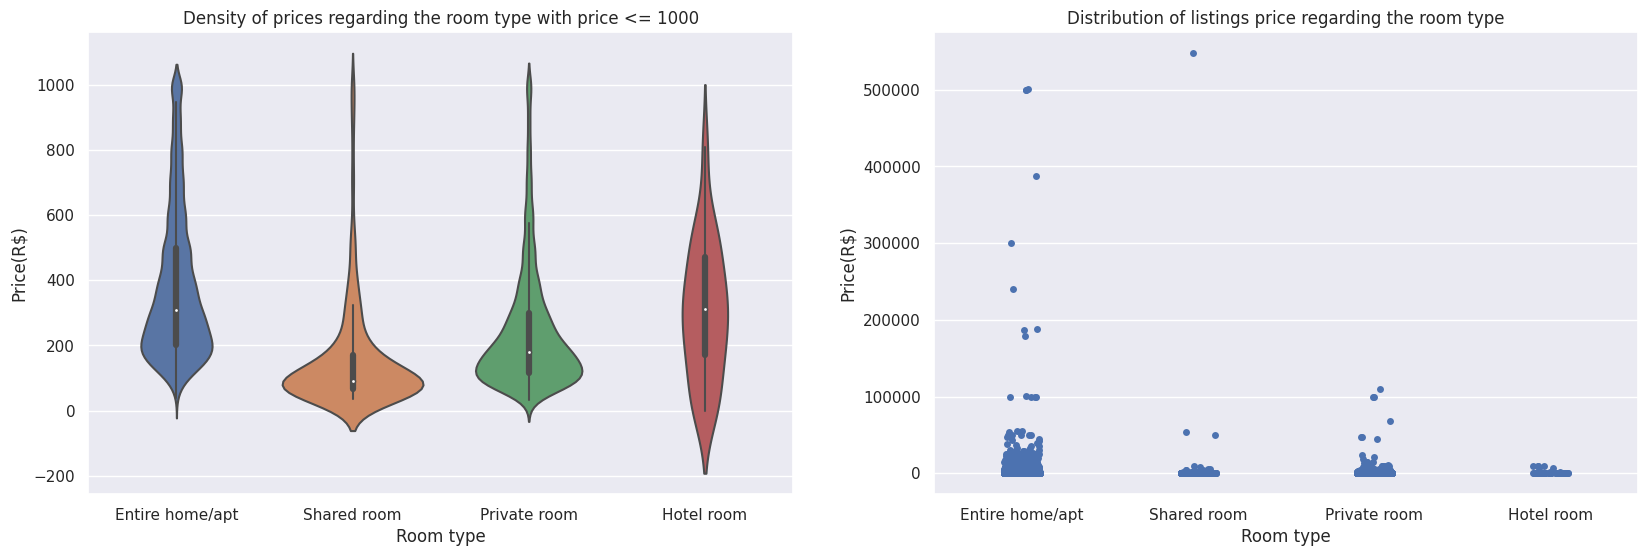

In [26]:
sns.set()

fig, (violin_rt, strip_rt) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.violinplot(
    data=df_complete[df_complete.price <= 1000], x="room_type", y="price", ax=violin_rt
)
violin_rt.set_title(
    "Density of prices regarding the room type with price <= 1000")
violin_rt.set_xlabel("Room type")
violin_rt.set_ylabel("Price(R$)")

sns.stripplot(data=df_complete, x="room_type",
              y="price", jitter=True, ax=strip_rt)
strip_rt.set_title("Distribution of listings price regarding the room type")
strip_rt.set_xlabel("Room type")
strip_rt.set_ylabel("Price(R$)")

plt.show()

Observing the Violin Plot where we plot the distribution for the prices below R\$ 1.000,00, we can see that the distribution is right-skewed, with a concentration of accommodations in the first and second quartile of prices.

Regard the strip plot, we can see the outliers of the data, since we don't filter them out. We can also see, regarding the `Entire home/apt` type of stay, that there are more expensive accommodations, with prices above R\$ 100.000,00. Maybe luxury apartments or mansions.


In [27]:
print(df_complete.neighbourhood_group.unique())

['Zona Sul', 'Centro', 'Zona Oeste', 'Zona Norte']
Categories (4, object): ['Zona Oeste', 'Centro', 'Zona Norte', 'Zona Sul']


#### Aqui vamos explorar algumas estatísticas isoladas pela área e analisar suas relações


In [28]:
def get_price_stats_by_area(df, area_name):
    region_df = df[df["neighbourhood_group"] == area_name]
    region_df = (
        region_df[["price"]]
        .describe(percentiles=[0.25, 0.50, 0.75, 0.99])
        .iloc[3:]
        .reset_index()
    )

    return region_df


regions = ["Zona Sul", "Centro", "Zona Oeste", "Zona Norte"]
stats_df_list = []

for region in regions:
    region_stats = get_price_stats_by_area(df_complete, region)
    region_stats = region_stats.rename(columns={"price": region})
    region_stats = region_stats.rename(columns={"index": "Stats"})
    stats_df_list.append(region_stats.set_index("Stats"))

result_df = pd.concat(stats_df_list, axis=1)
print(result_df)

       Zona Sul     Centro  Zona Oeste  Zona Norte
Stats                                             
min         0.0       0.00         0.0       33.00
25%       200.0     120.00       220.0      100.00
50%       321.0     180.00       390.0      186.00
75%       600.0     300.00       772.0      400.00
99%      6500.0    7034.64      8173.7     4787.12
max    500000.0  547643.00    500560.0   100000.00


Inspecting some statistics data about the price by each Administrative Zone of the city, we can take as insight the fact that the West Zone has the highest values in each of the price quartiles. On the other hand, the Center has the lowest values in such quartiles.

With this in mind, we can expect, in the graphical visualization, the Violin Plot of the West Zone having the highest values in the price distribution, and the Center and North Zones having the lowest values, extremely right-skewed.


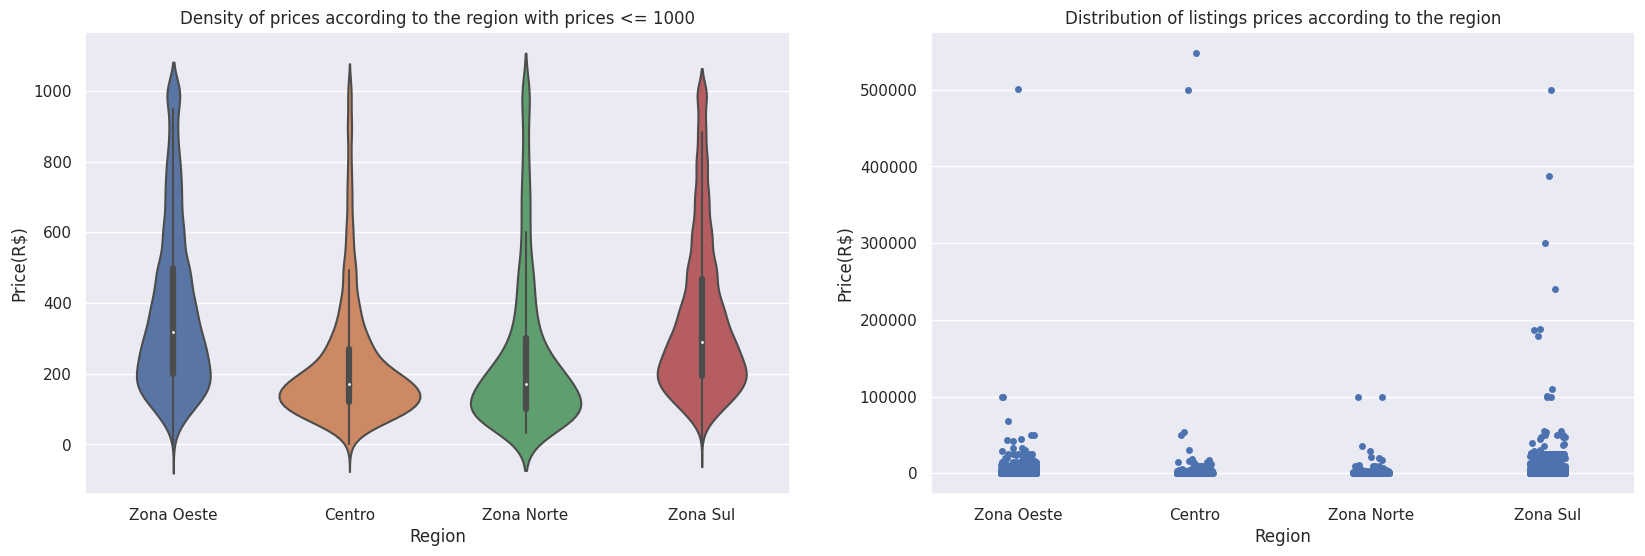

In [29]:
sns.set()
fig, (violin_ng, strip_ng) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.violinplot(
    data=df_complete[df_complete.price <= 1000],
    x="neighbourhood_group",
    y="price",
    ax=violin_ng,
)
violin_ng.set_title("Density of prices according to the region with prices <= 1000")
violin_ng.set_xlabel("Region")
violin_ng.set_ylabel("Price(R$)")

sns.stripplot(
    data=df_complete, x="neighbourhood_group", y="price", jitter=True, ax=strip_ng
)
strip_ng.set_title("Distribution of listings prices according to the region")
strip_ng.set_xlabel("Region")
strip_ng.set_ylabel("Price(R$)")

plt.show()

As expected we confirmed by the graphs the highest prices of accommodations in the West Zone, followed by the South Zone. The North and Central Zones with the lowest prices.


In [30]:
# Top 5 neighbourhoods with most listings
top_5_neighbourhoods = df_complete["neighbourhood"].value_counts().nlargest(5).index
top5_df = df_complete.loc[
    df_complete["neighbourhood"].isin(top_5_neighbourhoods), ["neighbourhood", "price"]
]

print(top_5_neighbourhoods)

Index(['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Jacarepaguá',
       'Recreio dos Bandeirantes'],
      dtype='object', name='neighbourhood')


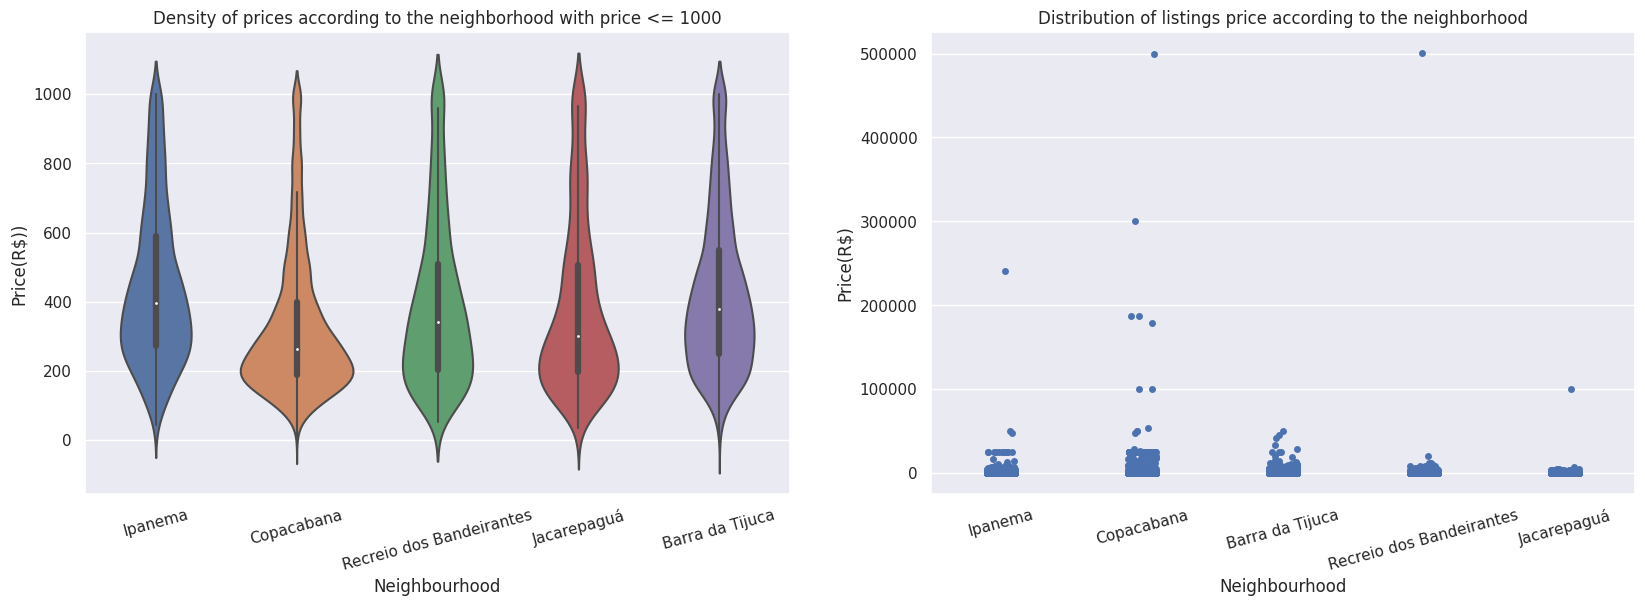

In [31]:
# Analogue to the analysis above we will do the same for the 5 main neighbourhoods
sns.set()
fig, (violin_nb, strip_nb) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.violinplot(
    data=top5_df[top5_df.price <= 1000], x="neighbourhood", y="price", ax=violin_nb
)
violin_nb.set_title(
    "Density of prices according to the neighborhood with price <= 1000"
)
violin_nb.set_xlabel("Neighbourhood")
violin_nb.set_ylabel("Price(R$))")
# Rotate labels
violin_nb.set_xticks(range(len(violin_nb.get_xticklabels())))
violin_nb.set_xticklabels(violin_nb.get_xticklabels(), rotation=15)

sns.stripplot(data=top5_df, x="neighbourhood", y="price", jitter=True, ax=strip_nb)
strip_nb.set_title("Distribution of listings price according to the neighborhood")
strip_nb.set_xlabel("Neighbourhood")
strip_nb.set_ylabel("Price(R$)")
# Rotate labels
strip_nb.set_xticks(range(len(strip_nb.get_xticklabels())))
strip_nb.set_xticklabels(strip_nb.get_xticklabels(), rotation=15)

plt.show()

Regarding the 5 main neighborhoods in number of accommodations, we see that Ipanema and Barra da Tijuca have higher prices, while Copacabana has the lowest prices. However, it is important to note that the number of accommodations in Copacabana is much higher than in the other neighborhoods, which may be a factor that influences the price.

Another important aspect to be highlighted is that, in the Strip Plot, we can see that there are more outliers in the Copacabana's prices, part of them above R\$ 10,000.00. This may be a factor that influences the price of the neighborhood, since the price of the outliers is much higher than the price of the other neighborhoods.


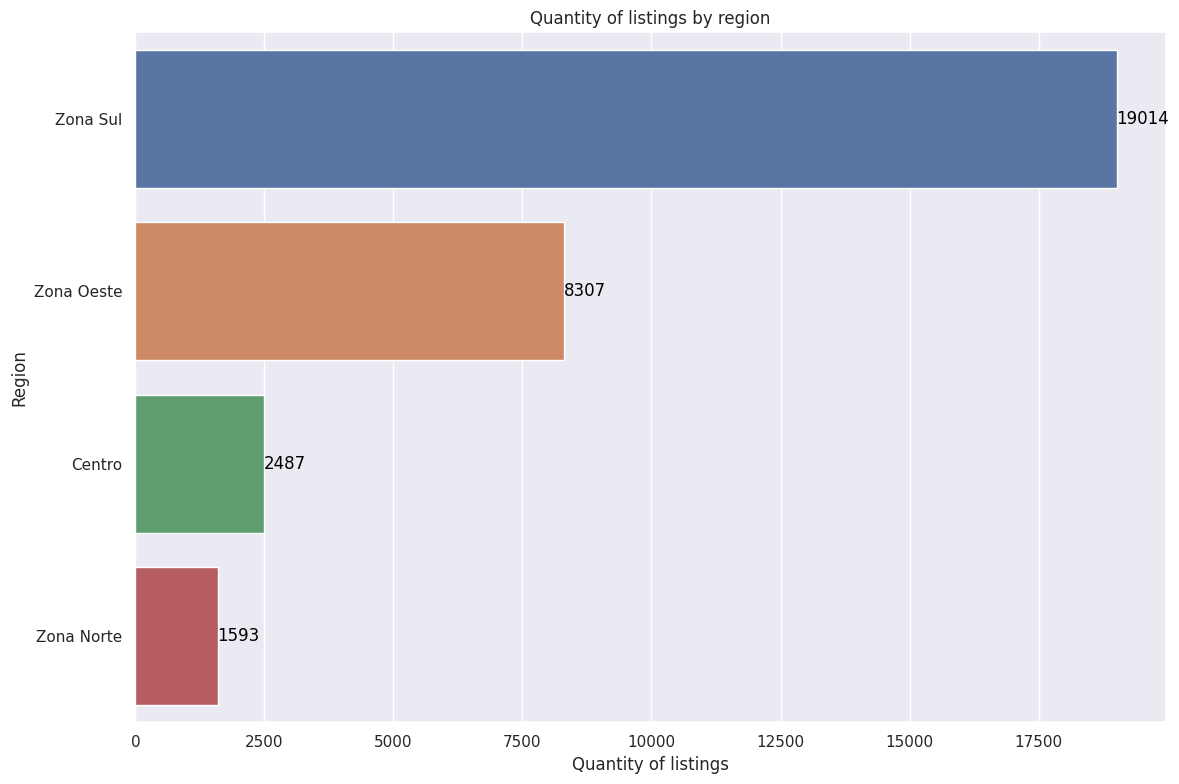

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(
    y="neighbourhood_group",
    data=df_complete,
    order=df_complete["neighbourhood_group"].value_counts().index,
)
plt.title("Quantity of listings by region")
plt.ylabel("Region")
plt.xlabel("Quantity of listings")
for i, v in enumerate(df_complete["neighbourhood_group"].value_counts()):
    plt.text(v - 5, i, str(v), color="black", ha="left", va="center")

plt.tight_layout()
plt.show()

Regarding the number of stays per region, we can now visualize this information that we presented before.


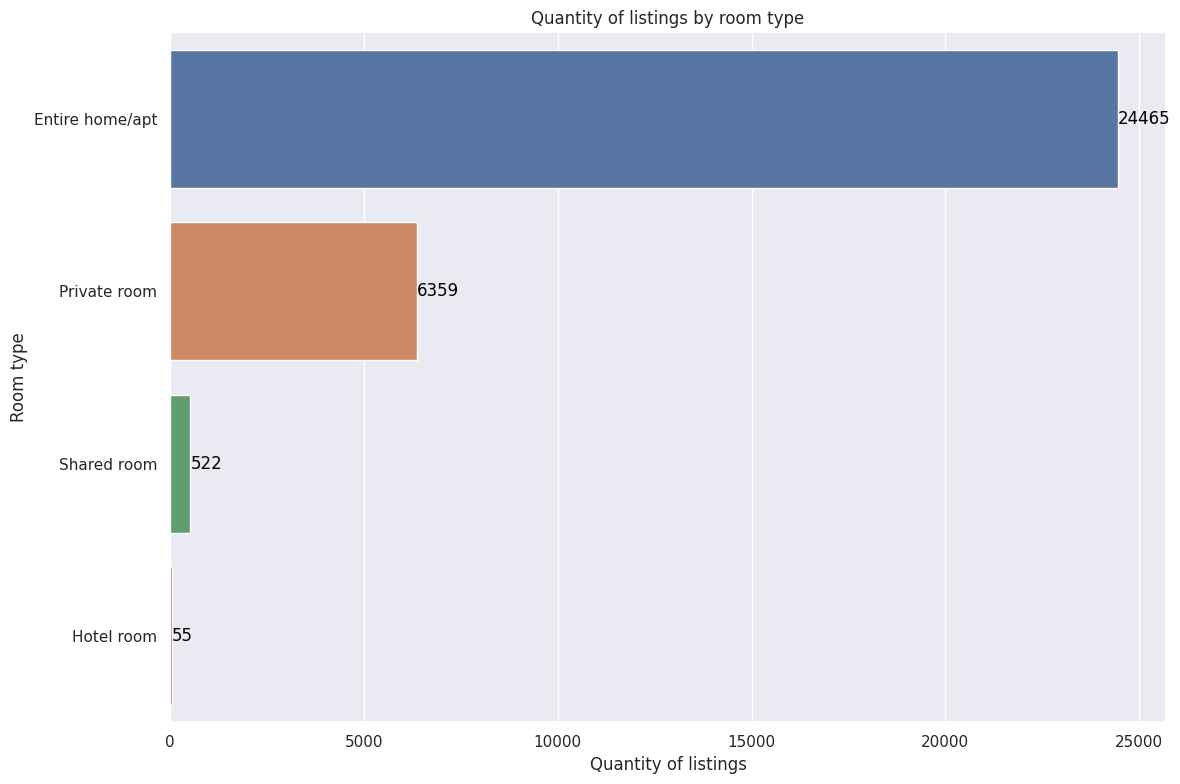

In [33]:
room_type_counts = df_complete["room_type"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.countplot(y="room_type", data=df_complete, order=room_type_counts.index)
plt.title("Quantity of listings by room type")
plt.ylabel("Room type")
plt.xlabel("Quantity of listings")

for i, v in enumerate(room_type_counts):
    plt.text(v - 5, i, str(v), color="black", ha="left", va="center")

plt.tight_layout()
plt.show()

Regarding the number of listings per room type, we can verify the disparity between the number of entire homes and private rooms, which are the most common types of accommodation in the city of Rio de Janeiro. The number of shared rooms is very low, which is expected, since this type of accommodation is not very common in the city. The number of hotel rooms is the lowest of all, which is also expected, since there are other platforms that are more suitable for this type of accommodation.


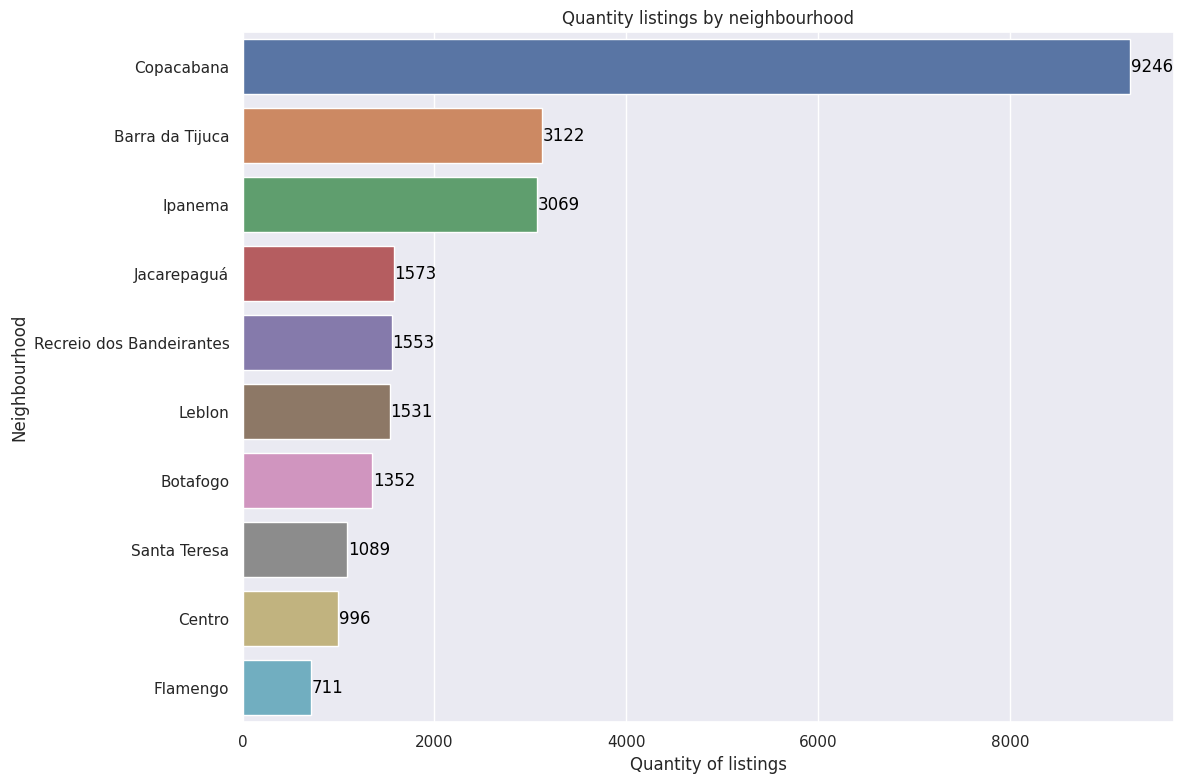

In [34]:
plt.figure(figsize=(12, 8))
sns.countplot(
    y="neighbourhood",
    data=df_complete,
    order=df_complete.neighbourhood.value_counts().iloc[:10].index,
)
plt.title("Quantity listings by neighbourhood")
plt.ylabel("Neighbourhood")
plt.xlabel("Quantity of listings")

for i, v in enumerate(df_complete["neighbourhood"].value_counts().iloc[:10]):
    plt.text(v + 10, i, str(v), color="black", ha="left", va="center")

plt.tight_layout()
plt.show()

In relation to the top 10 neighborhoods with more listings, we can visualize the disparity between Copacabana and the others. The number of listings in Copacabana is almost 3 times bigger than the second place, Barra da Tijuca.


In [35]:
# Get the limits of the coordinates to visualize in a graph
# https://osm.org/go/OVcURG

BBox = (
    df_complete.longitude.min(),
    df_complete.longitude.max(),
    df_complete.latitude.min(),
    df_complete.latitude.max(),
)
print(BBox)

(-43.72300934046507, -43.1044, -23.07327595626029, -22.74969)


In [36]:
# Read the Rio de Janeiro map
rio_map = plt.imread("./data/rio_map.png", 0)

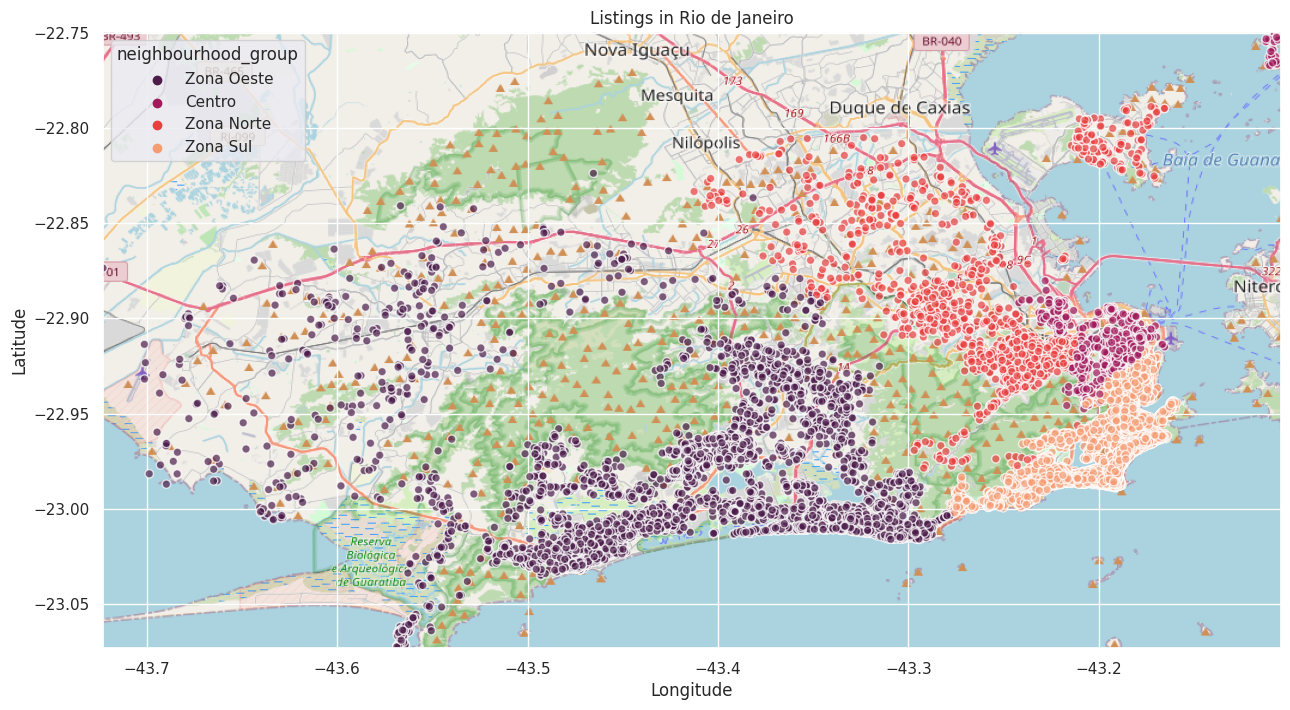

In [37]:
sns.set()
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(
    data=df_complete,
    y="latitude",
    x="longitude",
    hue="neighbourhood_group",
    palette="rocket",
    linewidth=1,
    alpha=0.7,
    zorder=1,
    legend="full",
)
ax.set_title("Listings in Rio de Janeiro")
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
img = ax.imshow(rio_map, zorder=0, extent=BBox, aspect="equal")
plt.show()

Using the Longitudinal and Latitudinal Limits of the City of Rio de Janeiro, it was possible to import the map above and position each of the 31,401 accommodations available in the city of Rio de Janeiro. Thus, we can visualize some striking characteristics of the city:

    1) The transition between West Zone and North Zone through Alto da Boa Vista.

    2) The passage from the South Zone to the West Zone through São Conrado.

    3) The presence of stays near the Antônio Carlos Jobim Airport.

    4) The difference between the areas occupied by the West Zone, South Zone, North Zone and Center.

    5) The difference size of the neighborhoods.


## Conclusions

Through this notebook we could analyze and provide different observations regarding the Listings of Airbnb in the city of Rio, one of the most touristic places in the world. We could see that the most expensive listings are located in the South Zone, which is the most touristic area of the city. We could also see that the most expensive listings are entire homes/apartments, which is not a surprise, since it is the most comfortable option for tourists.

This notebook was created to show the power of data analysis and how it can be used to provide insights and help in decision making. It is important to highlight that this notebook is not a complete analysis, it is just a sample of what can be done with the data provided by Airbnb. This Analysis was created in the beginning of 2020 and updated in 2023, any other analysis can be done, and the results may be different from the ones presented here.

Any suggestions or comments are welcome, feel free to contact me through my [LinkedIn](https://www.linkedin.com/in/balthapaixao/).
